In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
max_words = 10000
max_sequence_length = 900

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_words)

In [7]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_sequence_length)

In [13]:
model = Sequential([
    Embedding(max_words,100,input_length=max_sequence_length),
    GlobalMaxPooling1D(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_split=0.03)

Epoch 1/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.7268 - loss: 0.5362 - val_accuracy: 0.8547 - val_loss: 0.3400
Epoch 2/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8892 - loss: 0.2659 - val_accuracy: 0.8787 - val_loss: 0.3288
Epoch 3/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9159 - loss: 0.2185 - val_accuracy: 0.8840 - val_loss: 0.3138
Epoch 4/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9297 - loss: 0.1874 - val_accuracy: 0.8800 - val_loss: 0.3129
Epoch 5/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9380 - loss: 0.1654 - val_accuracy: 0.8747 - val_loss: 0.3233
Epoch 6/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9463 - loss: 0.1444 - val_accuracy: 0.8787 - val_loss: 0.3184
Epoch 7/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9518 - loss: 0.1309 - val_accuracy: 0.8800 - val_loss: 0.3131
Epoch 8/10
758/758 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9543 - loss: 0.1266 - 

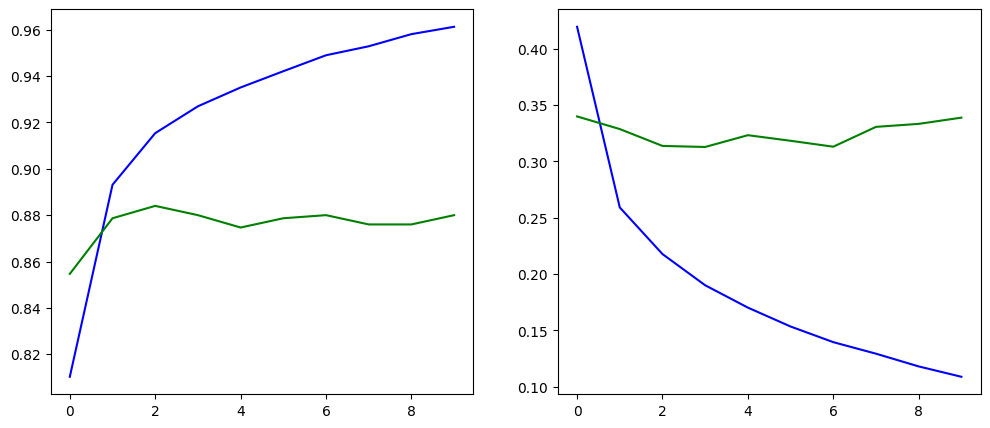

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color="blue")
plt.plot(history.history['val_accuracy'], color="green")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color="blue")
plt.plot(history.history['val_loss'], color="green")

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8757 - loss: 0.3390
0.334973007440567 0.8781200051307678


In [19]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob>0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


<Axes: >

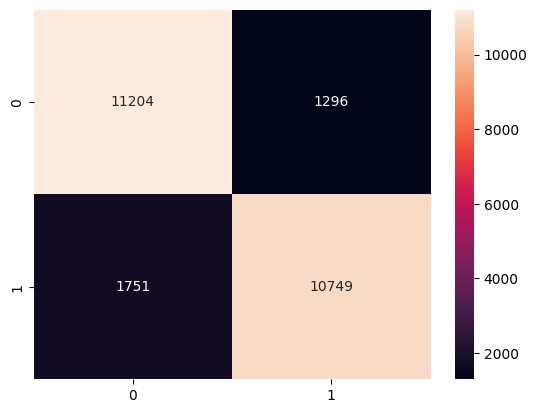

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12500
           1       0.89      0.86      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

